<a href="https://colab.research.google.com/github/milieureka/derivative-pricing/blob/main/Derivative_Pricing_Black_Scholes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Library

In [ ]:
import numpy as np
import pandas as pd
import numpy.random as npr
from scipy.stats import norm

# Step 1

### Black-Scholes closed-form solution to price the different European Options.

In [ ]:
#Step 1, Q1 - Pricing ATM European Call and Put Options
def bs_parameters(St,K,r,sigma,T,t):
    """Calculate d1 and d2 parameters for option pricing under
    the Black-Scholes model
    INPUTS: St - Stock price at time t, K - Strike price, r - risk-free rate,
    sigma - volatility, T - time to maturity, t - time
    OUTPUT: d1_param - d1 parameter, d2_param - d2 parameter"""
    d1_param=(np.log(St/K)+(r+(1/2)*sigma**2)*(T-t))/(sigma*np.sqrt(T-t))
    d2_param=d1_param-sigma*np.sqrt(T-t)
    return d1_param,d2_param
def bs_european_option(St,K,r,sigma,T,t,option_type='call'):
    """Price European Call and Put options under the Black-Scholes model
    INPUTS: St - Stock price at time t, K - Strike price, r - risk-free rate,
    sigma - volatility, T - time to maturity, t - time, option_type - 'call' or 'put'
    OUTPUT:
        option_price - Price of European call or put option under Black-Scholes model"""
    d1,d2=bs_parameters(St,K,r,sigma,T,t)
    if option_type.lower()=='call':
        option_price=St*norm.cdf(d1)-K*np.exp(-r*(T-t))*norm.cdf(d2)
    elif option_type.lower()=='put':
        option_price=K*np.exp(-r*(T-t))*norm.cdf(-d2)-St*norm.cdf(-d1)
    return option_price
#Parameters
S0=100 #Initial stock price
K=100 #Strike price for ATM option is equal to initial stock price
r=0.05 #Risk-free rate of 5%
sigma=0.2 #Volaility of 20%
T=0.25 #3 months maturity
t=0 #Calculate prices and sensitvities at time 0
print(f"European call price at time {t}: ${np.round(bs_european_option(S0,K,r,sigma,T,t,'call'),2)}")
print(f"European put price at time {t}: ${np.round(bs_european_option(S0,K,r,sigma,T,t,'put'),2)}")

European call price at time 0: $4.61
European put price at time 0: $3.37


In [ ]:
#Step 1, Q1 - Compute Greek Delta for European Call and Put Options at time 0
#using exact Black-Scholes formula and finite-difference scheme
S_increment=0.0001*S0 #Increment of 0.01% of initial stock price for numerical delta
def bs_european_delta(St,K,r,sigma,T,t,option_type='call'):
    """Calculate Delta (sensitivity to stock price) exactly under the Black-Scholes
    model for European Call and Put options
    INPUTS: St - Stock price at time t, K - Strike price, r - risk-free rate,
    sigma - volatility, T - time to maturity, t - time, option_type - 'call' or 'put'
    OUTPUT: delta - Greek Delta calculated using exact formula under Black-Scholes"""
    d1,_=bs_parameters(St,K,r,sigma,T,t)
    if option_type.lower()=='call':
        delta=norm.cdf(d1)
    elif option_type.lower()=='put':
        delta=norm.cdf(d1)-1
    return delta
def bs_european_delta_estimate(St,S_increment,K,r,sigma,T,t,option_type='call'):
    """Estimate Delta for European call and put options using a first-order forward
    finite-difference scheme
    INPUTS: St - Stock price at time t, S_increment - Small change in stock price,
    K - Strike price, r - risk-free rate, sigma- volatility, T - time to maturity,
    t - time, option_type - 'call' or 'put'
    OUTPUT: delta_est - Estimated Greek Delta based on first-order foward
    finite-difference scheme"""
    delta_est=(bs_european_option(St+S_increment,K,r,sigma,T,t,option_type)-bs_european_option(St,K,r,sigma,T,t,option_type))/S_increment
    return delta_est
print(f"Exact European call delta at time {t}: {bs_european_delta(S0,K,r,sigma,T,t,'call')}")
print(f"Estimated European call delta at time {t}: {bs_european_delta_estimate(S0,S_increment,K,r,sigma,T,t,option_type='call')}")
print(f"Exact European put delta at time {t}: {bs_european_delta(S0,K,r,sigma,T,t,'put')}")
print(f"Estimated European put delta at time {t}: {bs_european_delta_estimate(S0,S_increment,K,r,sigma,T,t,option_type='put')}")

Exact European call delta at time 0: 0.5694601832076737
Estimated European call delta at time 0: 0.5696566051923924
Exact European put delta at time 0: -0.43053981679232634
Estimated European put delta at time 0: -0.43034339480882977


I'll exact Black-Scholes formula and finite-difference scheme. Note that Vega is the same for both European Call and Put options

In [ ]:
#Step 1, Q1 - Compute Greek Vega for European Call and Put options
sigma_increment=0.05 # 5% increase in volatility for numerical vega
def bs_european_vega(St,K,r,sigma,T,t):
    """Calculate vega (sensitivity to volatility) exactly for European options
    under the Black-Scholes model
    INPUTS: St - Stock price at time t, K - Strike price, r - risk-free rate,
    sigma - volatility, T - time to maturity, t - time
    OUTPUT: vega - Greek vega calculated using Black-Scholes model"""
    d1,_=bs_parameters(St,K,r,sigma,T,t)
    vega=St*norm.pdf(d1)*np.sqrt(T-t)
    return vega
def bs_european_vega_estimate(St,K,r,sigma,sigma_increment,T,t):
    """Estimate vega for European call and put options using a first-order forward
    finite-difference scheme
    INPUTS: St - Stock price at time t, K - Strike price, r - risk-free rate,
    sigma- volatility, sigma_increment - small change in volatility,
    T - time to maturity, t - time
    OUTPUT: vega_est - Estimated Greek vega based on first-order foward
    finite-difference scheme"""
    vega_est=(bs_european_option(St,K,r,sigma+sigma_increment,T,t,option_type='call')-bs_european_option(St,K,r,sigma,T,t,option_type='call'))/sigma_increment
    return vega_est
print(f"Exact Vega at time {t}: {bs_european_vega(S0,K,r,sigma,T,t)}")
print(f"Estimated Vega at time {t}: {bs_european_vega_estimate(S0,K,r,sigma,sigma_increment,T,t)}")

Exact Vega at time 0: 19.644000472368965
Estimated Vega at time 0: 19.668062236956274


### Q2.Part 1
Price an ATM European call and put:
a. Choose the number of steps in the tree you see convenient to achieve
reliable estimates.
b. Briefly describe the overall process, as well as a reason why you choose
that number of steps in the tree.

In [ ]:
def bs_option_mc_daily(S0, K, r, sigma, T, num_simulations, num_steps):

    # Calculate time step
    dt = T / num_steps

    # Monte Carlo simulation
    np.random.seed(42)  # For reproducibility
    stock_paths = np.zeros((num_simulations, num_steps + 1))
    stock_paths[:, 0] = S0
    np.random.seed(42)
    for t in range(1, num_steps + 1):
        # Generate random standard normal variables for each path
        Z = np.random.standard_normal(num_simulations)
        # Apply GBM formula
        stock_paths[:, t] = stock_paths[:, t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)

    # Calculate option payoffs at maturity
    call_payoffs = np.maximum(stock_paths[:, -1] - K, 0)
    put_payoffs = np.maximum(K - stock_paths[:, -1], 0)

    # Discount the average payoff back to present value
    call_price = np.exp(-r * T) * np.mean(call_payoffs)
    put_price = np.exp(-r * T) * np.mean(put_payoffs)

    # Display the results
    print(f"European Call Option Price: {call_price:.2f}")
    print(f"European Put Option Price: {put_price:.2f}")

    return


S0 = 100
K = 100
T = 0.25
r = 0.05
sigma = 0.2
num_simulations = 1000000
num_steps = 252
bs_option_mc_daily(S0, K, r, sigma, T, num_simulations, num_steps)

European Call Option Price: 4.60
European Put Option Price: 3.38


### Q2. Part 2
Compute the Greek Delta for the European call and European put at time 0:
a. How do they compare?
b. Comment briefly on the differences and signs of Delta for both options.
What does delta proxy for? Why does it make sense to obtain a
positive/negative delta for each option?



In [ ]:
import numpy as np
S0 = 100
K = 100
T = 0.25
r = 0.05
sigma = 0.2
num_simulations = 1000000
num_steps = 252
epsilon = 0.01 * S0  # Small increment in stock price

# Calculate time step
dt = T / num_steps

# Function to simulate option prices
def simulate_option_price(S0, K, T, r, sigma, num_simulations, num_steps):
    np.random.seed(42)  # For reproducibility
    stock_paths = np.zeros((num_simulations, num_steps + 1))
    stock_paths[:, 0] = S0

    for t in range(1, num_steps + 1):
        Z = np.random.standard_normal(num_simulations)
        stock_paths[:, t] = stock_paths[:, t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)

    call_payoffs = np.maximum(stock_paths[:, -1] - K, 0)
    put_payoffs = np.maximum(K - stock_paths[:, -1], 0)

    call_price = np.exp(-r * T) * np.mean(call_payoffs)
    put_price = np.exp(-r * T) * np.mean(put_payoffs)

    return call_price, put_price


call_price_up, put_price_up = simulate_option_price(S0 + epsilon, K, T, r, sigma, num_simulations, num_steps)
call_price_down, put_price_down = simulate_option_price(S0 - epsilon, K, T, r, sigma, num_simulations, num_steps)


call_delta = (call_price_up - call_price_down) / (2 * epsilon)
put_delta = (put_price_up - put_price_down) / (2 * epsilon)

# Display the results
print(f"European Call Delta: {call_delta:.2f}")
print(f"European Put Delta: {put_delta:.2f}")


European Call Delta: 0.57
European Put Delta: -0.43


###Q3. Part 3
Delta measures one sensitivity of the option price. But there are other important
sensitivities we will look at throughout the course. An important one is the
sensitivity of the option price to the underlying volatility (vega)..
a. Compute the sensitivity of previous put and call option prices to a 5%
increase in volatility (from 20% to 25%). How do prices change with
respect to the change in volatility?
b. Comment on the potential differential impact of this change for call and
put options.

In [ ]:
import numpy as np

S0 = 100
K = 100
T = 0.25
r = 0.05
sigma = 0.2
num_simulations = 1000000
num_steps = 252
epsilon = 0.01 * S0  # Small increment in stock price

dt = T / num_steps

def simulate_option_price(S0, K, T, r, sigma, num_simulations, num_steps):
    np.random.seed(42)  # For reproducibility
    stock_paths = np.zeros((num_simulations, num_steps + 1))
    stock_paths[:, 0] = S0

    for t in range(1, num_steps + 1):
        Z = np.random.standard_normal(num_simulations)
        stock_paths[:, t] = stock_paths[:, t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)

    call_payoffs = np.maximum(stock_paths[:, -1] - K, 0)
    put_payoffs = np.maximum(K - stock_paths[:, -1], 0)

    call_price = np.exp(-r * T) * np.mean(call_payoffs)
    put_price = np.exp(-r * T) * np.mean(put_payoffs)

    return call_price, put_price

call_price_up, put_price_up = simulate_option_price(S0, K, T, r, sigma + epsilon, num_simulations, num_steps)
call_price_down, put_price_down = simulate_option_price(S0, K, T, r, sigma - epsilon, num_simulations, num_steps)


call_vega = (call_price_up - call_price_down) / (2 * epsilon)
put_vega = (put_price_up - put_price_down) / (2 * epsilon)


print(f"European Call Vega: {call_vega:.2f}")
print(f"European Put Vega: {put_vega:.2f}")


European Call Vega: 3.78
European Put Vega: 3.87


### Q3. Part A Checking that Put-Call parity is satisfied under both methods (BS and MC).

In [ ]:
import numpy as np
from scipy.stats import norm

# Black-Scholes model
def bs_parameters(St, K, r, sigma, T, t):
    d1_param = (np.log(St / K) + (r + 0.5 * sigma ** 2) * (T - t)) / (sigma * np.sqrt(T - t))
    d2_param = d1_param - sigma * np.sqrt(T - t)
    return d1_param, d2_param

def bs_european_option(St, K, r, sigma, T, t, option_type='call'):
    d1, d2 = bs_parameters(St, K, r, sigma, T, t)
    if option_type.lower() == 'call':
        option_price = St * norm.cdf(d1) - K * np.exp(-r * (T - t)) * norm.cdf(d2)
    elif option_type.lower() == 'put':
        option_price = K * np.exp(-r * (T - t)) * norm.cdf(-d2) - St * norm.cdf(-d1)
    return option_price

# Monte Carlo GBM model
def bs_option_mc_daily(S0, K, r, sigma, T, num_simulations, num_steps):
    dt = T / num_steps
    np.random.seed(42)
    stock_paths = np.zeros((num_simulations, num_steps + 1))
    stock_paths[:, 0] = S0

    for t in range(1, num_steps + 1):
        Z = np.random.standard_normal(num_simulations)
        stock_paths[:, t] = stock_paths[:, t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)

    call_payoffs = np.maximum(stock_paths[:, -1] - K, 0)
    put_payoffs = np.maximum(K - stock_paths[:, -1], 0)
    call_price = np.exp(-r * T) * np.mean(call_payoffs)
    put_price = np.exp(-r * T) * np.mean(put_payoffs)

    return call_price, put_price

# Parameters
S0 = 100      # Initial stock price
K = 100       # Strike price
T = 0.25      # Time to maturity (3 months)
r = 0.05      # Risk-free rate
sigma = 0.2   # Volatility
t = 0         # Current time
num_simulations = 1000000  # Increase the number of simulations
num_steps = 252

# 1. Black-Scholes Analytical Prices
bs_call_price = bs_european_option(S0, K, r, sigma, T, t, 'call')
bs_put_price = bs_european_option(S0, K, r, sigma, T, t, 'put')

# 2. Monte Carlo Simulation Prices
mc_call_price, mc_put_price = bs_option_mc_daily(S0, K, r, sigma, T, num_simulations, num_steps)

# 3. Put-Call Parity Check
# Theoretical parity value
parity_value = S0 - K * np.exp(-r * T)

# Calculate the differences for each method
# Calculate the differences for each method and round to 3 decimal places
bs_parity_diff = round(bs_call_price - bs_put_price - parity_value,10)
mc_parity_diff = round(mc_call_price - mc_put_price - parity_value,10)

# Display results
print(f"Black-Scholes Call Price: {bs_call_price:.10f}")
print(f"Black-Scholes Put Price: {bs_put_price:.10f}")
print(f"Monte Carlo Call Price: {mc_call_price:.10f}")
print(f"Monte Carlo Put Price: {mc_put_price:.10f}")
print(f"Theoretical Put-Call Parity Value: {parity_value:.10f}")
print(f"Black-Scholes Put-Call Parity Difference: {bs_parity_diff:.10f}")
print(f"Monte Carlo Put-Call Parity Difference: {mc_parity_diff:.10f}")

Black-Scholes Call Price: 4.6149971296
Black-Scholes Put Price: 3.3727771790
Monte Carlo Call Price: 4.6026062423
Monte Carlo Put Price: 3.3762625288
Theoretical Put-Call Parity Value: 1.2422199506
Black-Scholes Put-Call Parity Difference: -0.0000000000
Monte Carlo Put-Call Parity Difference: -0.0158762371


In [ ]:
tolerance = 1e-5  # Tolerance for floating-point comparisons

if bs_parity_diff < tolerance:
    print("Black-Scholes satisfies Put-Call Parity.")
else:
    print("Black-Scholes does NOT satisfy Put-Call Parity.")

if mc_parity_diff < tolerance:
    print("Monte Carlo satisfies Put-Call Parity.")
else:
    print("Monte Carlo does NOT satisfy Put-Call Parity.")

Black-Scholes satisfies Put-Call Parity.
Monte Carlo satisfies Put-Call Parity.


### Q3. Part B Compare and discuss the prices obtained in both methods: do they converge? why/why not?

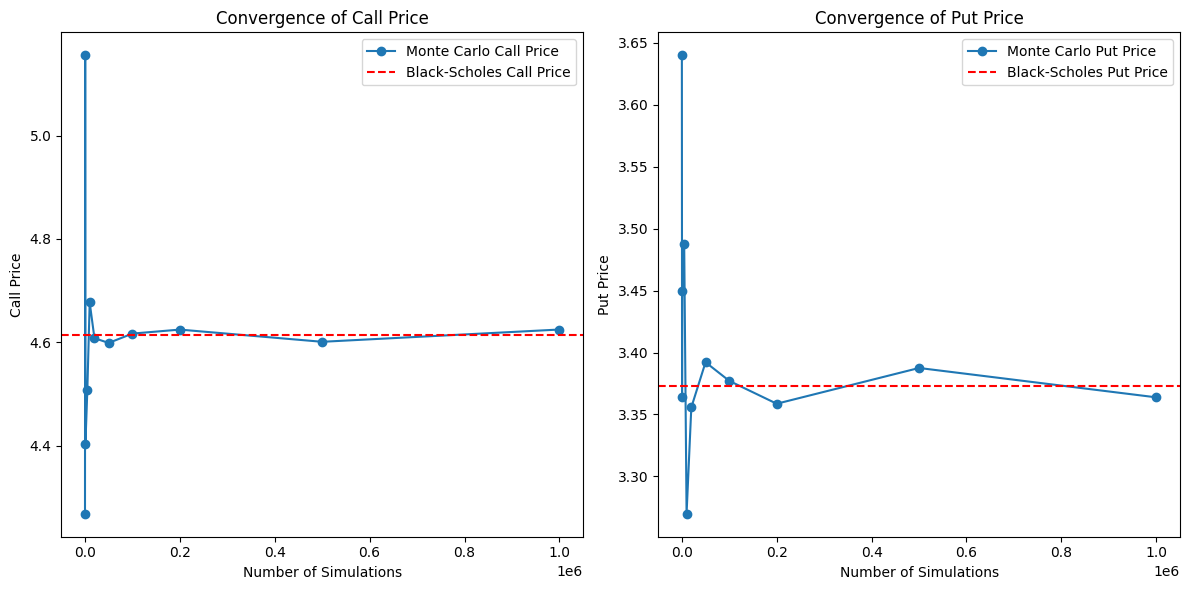

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes model
def bs_parameters(St, K, r, sigma, T, t):
    d1_param = (np.log(St / K) + (r + 0.5 * sigma ** 2) * (T - t)) / (sigma * np.sqrt(T - t))
    d2_param = d1_param - sigma * np.sqrt(T - t)
    return d1_param, d2_param

def bs_european_option(St, K, r, sigma, T, t, option_type='call'):
    d1, d2 = bs_parameters(St, K, r, sigma, T, t)
    if option_type.lower() == 'call':
        option_price = St * norm.cdf(d1) - K * np.exp(-r * (T - t)) * norm.cdf(d2)
    elif option_type.lower() == 'put':
        option_price = K * np.exp(-r * (T - t)) * norm.cdf(-d2) - St * norm.cdf(-d1)
    return option_price

# Monte Carlo GBM model
def mc_option_price(S0, K, r, sigma, T, num_simulations, num_steps):
    dt = T / num_steps
    stock_paths = np.zeros((num_simulations, num_steps + 1))
    stock_paths[:, 0] = S0

    for t in range(1, num_steps + 1):
        Z = np.random.standard_normal(num_simulations)
        stock_paths[:, t] = stock_paths[:, t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)

    call_payoffs = np.maximum(stock_paths[:, -1] - K, 0)
    put_payoffs = np.maximum(K - stock_paths[:, -1], 0)
    call_price = np.exp(-r * T) * np.mean(call_payoffs)
    put_price = np.exp(-r * T) * np.mean(put_payoffs)

    return call_price, put_price

# Parameters
S0 = 100      # Initial stock price
K = 100       # Strike price
T = 0.25      # Time to maturity (3 months)
r = 0.05      # Risk-free rate
sigma = 0.2   # Volatility
t = 0         # Current time
num_steps = 252

bs_call_price = bs_european_option(S0, K, r, sigma, T, t, 'call')
bs_put_price = bs_european_option(S0, K, r, sigma, T, t, 'put')

simulation_counts = [100, 500, 1000, 5000,10000,20000,50000,100000,200000,500000,1000000]
mc_call_prices = []
mc_put_prices = []

for num_simulations in simulation_counts:
    mc_call_price, mc_put_price = mc_option_price(S0, K, r, sigma, T, num_simulations, num_steps)
    mc_call_prices.append(mc_call_price)
    mc_put_prices.append(mc_put_price)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].plot(simulation_counts, mc_call_prices, label='Monte Carlo Call Price', marker='o')
axes[0].axhline(y=bs_call_price, color='r', linestyle='--', label='Black-Scholes Call Price')
axes[0].set_title('Convergence of Call Price')
axes[0].set_xlabel('Number of Simulations')
axes[0].set_ylabel('Call Price')
axes[0].legend()

axes[1].plot(simulation_counts, mc_put_prices, label='Monte Carlo Put Price', marker='o')
axes[1].axhline(y=bs_put_price, color='r', linestyle='--', label='Black-Scholes Put Price')
axes[1].set_title('Convergence of Put Price')
axes[1].set_xlabel('Number of Simulations')
axes[1].set_ylabel('Put Price')
axes[1].legend()

plt.tight_layout()
plt.show()


# Step 2

### Q4.
use Monte-Carlo methods with regular GBM process and daily simulations on an American Call option.

In [ ]:
#Step 2, Q4 - Pricing American Call option using Monte Carlo methods with regular GBM process and daily simulations
from numpy.polynomial.polynomial import Polynomial
def bs_american_call_mc(St,K,r,sigma,T,t,N,M):
    """Price American Call option using Monte-Carlo (MC) simulation for Geometric
    Brownian Motion process (GBM) under the risk-neutral measure
    INPUTS: St - Stock price at time t, K - Strike price, r - risk-free rate,
    sigma - volatility, T - time to maturity, t - time, N - number of steps in
    Monte-Carlo simulation, M - number of paths to simulate
    OUPUT: Ct - Price of American call option at time t"""
    dt=(T-t)/N
    np.random.seed(0)
    Z=np.random.normal(size=(N,M))
    discount_factor=np.exp(-r*dt)
    St_path=np.zeros((N+1,M))
    St_path[0,:]=St
    for i in range(1,N+1):
        St_path[i:]=St_path[i-1,:]*np.exp((r-0.5*sigma**2)*dt+sigma*np.sqrt(dt)*Z[i-1,:])
    Ct_path=np.maximum(St_path-K,0)
    cashflows=Ct_path[-1,:].copy()
    for j in range(N-1,0,-1):
        in_the_money=Ct_path[j,:]>0
        St_in_the_money=St_path[j,in_the_money]
        future_cashflows=cashflows[in_the_money]*discount_factor
        if len(St_in_the_money)>0:
            regression=Polynomial.fit(St_in_the_money,future_cashflows,6).convert()
            continuation_value=regression(St_in_the_money)
            exercise=Ct_path[j,in_the_money]>=continuation_value
            cashflows[in_the_money]=np.where(exercise,Ct_path[j,in_the_money],future_cashflows)
    call_price=np.mean(cashflows)*np.exp(-r*(T-t))
    return call_price
N=252 #252 trading days in a year
M=100000 # Number of paths to simulate in Monte-Carlo simulation
C0=bs_american_call_mc(S0,K,r,sigma,T,t,N,M) #Price of American call option
print("American call price at time 0 is ${0}".format(np.round(C0, 2)))

American call price at time 0 is $4.56


In [ ]:
#Step 2, Q4 - Calculate Greek Delta for American Call option using finite-difference scheme
def bs_american_call_delta_estimate(St,S_increment,K,r,sigma,T,t,N,M):
    """Estimate delta for American Call option using forward finite-difference
    scheme
    INPUTS: St - Stock price at time t, S_increment - Small change in stock price,
    K - Strike price, r - risk-free rate, sigma - volatility, T - time to maturity,
    t - time, N - number of steps in MC simulation, M - number of paths simulated
    in MC
    OUTPUT: delta_est - Estimated Greek delta for American call option"""
    Ct_noinc=bs_american_call_mc(St,K,r,sigma,T,t,N,M)
    Ct_inc=bs_american_call_mc(St+S_increment,K,r,sigma,T,t,N,M)
    delta_est=(Ct_inc-Ct_noinc)/S_increment
    return delta_est
delta_estimate=bs_american_call_delta_estimate(S0,S_increment,K,r,sigma,T,t,N,M)
print(f"Estinated American call delta at time {t}: {delta_estimate}")

Estinated American call delta at time 0: 0.5807505563181437


In [ ]:
#Step 2, Q4 - Calculate Greek vega for American Call option using finite-difference scheme
def bs_american_call_vega_estimate(St,K,r,sigma,sigma_increment,T,t,N,M):
    """Estimate Greek vega for American Call option using forward finite-difference
    scheme
    INPUTS: St - Stock price at time t, K - Strike price, r - risk-free rate,
    sigma - volatility, sigma_increment - small change in volatility,
    T - time to maturity, t - time, N - number of steps in MC simulation,
    M - number of paths simulated in MC
    OUTPUT: vega_est - Estimated Greek vega for American Call option"""
    Ct_noinc=bs_american_call_mc(St,K,r,sigma,T,t,N,M)
    Ct_inc=bs_american_call_mc(St,K,r,sigma+sigma_increment,T,t,N,M)
    vega_est=(Ct_inc-Ct_noinc)/sigma_increment
    return vega_est
vega_estimate=bs_american_call_vega_estimate(S0, K, r, sigma, sigma_increment, T,t, N, M)
print(f"Estinated American call vega at time {t}: {vega_estimate}")

Estinated American call vega at time 0: 19.316102999063016


### Q5.
Price an ATM American call and put:
a. Choose the number of steps in the tree you see convenient to achieve
reliable estimates.
b. Briefly describe the overall process, as well as a reason why you choose
that number of steps in the tree.

6. Compute the Greek Delta for the American call and put at time 0:
a. How do they compare?
b. Comment briefly on the differences and signs of Delta for both options.
What does delta proxy for? Why does it make sense to obtain a
positive/negative delta for each option?

7. Delta measures one sensitivity of the option price. But there are other important
sensitivities we will look at throughout the course. An important one is the
sensitivity of the option price to the underlying volatility (vega)..
a. Compute the sensitivity of previous put and call option prices to a 5%
increase in volatility (from 20% to 25%). How do prices change with
respect to the change in volatility?
b. Comment on the potential differential impact of this change for call and
put options.

In [ ]:
import numpy as np
class AmericanOptions(object):
    def __init__(self, option_type, S0, strike, T, M, r, div, sigma, simulations):
        self.option_type = option_type
        self.S0 = float(S0)
        self.strike = float(strike)
        self.T = float(T)
        self.M = int(M)
        self.r = float(r)
        self.div = float(div)
        self.sigma = float(sigma)
        self.simulations = int(simulations)
        self.time_unit = self.T / float(self.M)
        self.discount = np.exp(-self.r * self.time_unit)

    @property
    def MCprice_matrix(self, seed = 42):
      """ Returns MC price matrix rows: time columns: price-path simulation """
      np.random.seed(seed)
      MCprice_matrix = np.zeros((self.M + 1, self.simulations), dtype=np.float64)
      MCprice_matrix[0,:] = self.S0
      for t in range(1, self.M + 1):
          brownian = np.random.standard_normal(int(self.simulations // 2))
          brownian = np.concatenate((brownian, -brownian))
          MCprice_matrix[t, :] = (MCprice_matrix[t - 1, :]
                                * np.exp((self.r - self.sigma ** 2 / 2.) * self.time_unit
                                + self.sigma * brownian * np.sqrt(self.time_unit)))
      return MCprice_matrix

    @property
    def MCpayoff(self):
      """Returns the inner-value of American Option"""
      if self.option_type == 'call':
          payoff = np.maximum(self.MCprice_matrix - self.strike,
                        np.zeros((self.M + 1, self.simulations),dtype=np.float64))
      else:
          payoff = np.maximum(self.strike - self.MCprice_matrix,
                          np.zeros((self.M + 1, self.simulations),
                          dtype=np.float64))
      return payoff

    @property
    def value_vector(self):
        value_matrix = np.zeros_like(self.MCpayoff)
        value_matrix[-1, :] = self.MCpayoff[-1, :]
        for t in range(self.M - 1, 0 , -1):
            regression = np.polyfit(self.MCprice_matrix[t, :], value_matrix[t + 1, :] * self.discount, 5)
            continuation_value = np.polyval(regression, self.MCprice_matrix[t, :])
            value_matrix[t, :] = np.where(self.MCpayoff[t, :] > continuation_value,
                                          self.MCpayoff[t, :],
                                          value_matrix[t + 1, :] * self.discount)

        return value_matrix[1,:] * self.discount


    @property
    def price(self): return np.sum(self.value_vector) / float(self.simulations)

    @property
    def delta(self):
        diff = self.S0 * 0.01
        myCall_1 = AmericanOptions(self.option_type, self.S0 + diff,
                                      self.strike, self.T, self.M,
                                      self.r, self.div, self.sigma, self.simulations)
        myCall_2 = AmericanOptions(self.option_type, self.S0 - diff,
                                      self.strike, self.T, self.M,
                                      self.r, self.div, self.sigma, self.simulations)
        return (myCall_1.price - myCall_2.price) / float(2. * diff)

    @property
    def vega(self):
        diff = self.sigma * 0.01
        myCall_1 = AmericanOptions(self.option_type, self.S0,
                                      self.strike, self.T, self.M,
                                      self.r, self.div, self.sigma + diff,
                                      self.simulations)
        myCall_2 = AmericanOptions(self.option_type, self.S0,
                                      self.strike, self.T, self.M,
                                      self.r, self.div, self.sigma - diff,
                                      self.simulations)
        return (myCall_1.price - myCall_2.price) / float(2. * diff)

In [ ]:
S0 = 100
K = 100
T = 0.25
r = 0.05
sigma = 0.2
num_simulations = 10000
num_steps = 252

AmericanPUToption = AmericanOptions('put', S0, K, T, num_steps, r, 0, sigma, num_simulations)
print (f"American put price: {AmericanPUToption.price:.2f}")
print (f"American put delta: {AmericanPUToption.delta:.2f}")
print (f"American put vega: {AmericanPUToption.vega:.2f}")

American put price: 3.43
American put delta: -0.45
American put vega: 20.55


### Q6

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate option prices for different moneyness levels
def calculate_option_prices(S0, T, r, sigma, num_simulations, num_steps):
    moneyness_levels = [0.9, 0.95, 1.0, 1.05, 1.1]  # 90%, 95%, ATM, 105%, 110%
    call_prices = []
    put_prices = []

    for m in moneyness_levels:
        K = S0 * m

        AmericanCALLoption = AmericanOptions('call', S0, K, T, num_steps, r, 0, sigma, num_simulations)
        call_prices.append(AmericanCALLoption.price)

        AmericanPUToption = AmericanOptions('put', S0, K, T, num_steps, r, 0, sigma, num_simulations)
        put_prices.append(AmericanPUToption.price)

    return moneyness_levels, call_prices, put_prices

def plot_option_prices(moneyness_levels, call_prices, put_prices):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(moneyness_levels, call_prices, marker='o', color='blue', label="Call Option Price")
    plt.xlabel("Moneyness (K / S0)")
    plt.ylabel("Option Price")
    plt.title("American Call Option Price vs Moneyness")
    plt.grid(True)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(moneyness_levels, put_prices, marker='o', color='red', label="Put Option Price")
    plt.xlabel("Moneyness (K / S0)")
    plt.ylabel("Option Price")
    plt.title("American Put Option Price vs Moneyness")
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Parameters
S0 = 100
T = 0.25
r = 0.05
sigma = 0.2
num_simulations = 10000
num_steps = 252

moneyness_levels, call_prices, put_prices = calculate_option_prices(S0, T, r, sigma, num_simulations, num_steps)
plot_option_prices(moneyness_levels, call_prices, put_prices)


In [ ]:
import pandas as pd
df = pd.DataFrame({
    'Moneyness': [f"{int(m * 100)}%" for m in moneyness_levels],
    'Call Price': call_prices,
    'Put Price': put_prices
})

# Display the DataFrame
print(df)

# Step 3

### Q7.
European options with same characteristics under different levels of moneyness

In [ ]:
#Step 3, Q7a) - Pricing European call option with 110% moneyness and European put option with 95% moneyness
K_110=1.1*S0 #110% moneyness for European call option
K_95=0.95*S0 #95% moneyness for European put option
#Use previous bs_european_option to calculate Call and Put prices
print(f"European call price with 110% moneyness at time {t}: ${np.round(bs_european_option(S0,K_110,r,sigma,T,t,option_type='call'),2)}")
print(f"European put price with 95% moneyness at time {t}: ${np.round(bs_european_option(S0,K_95,r,sigma,T,t,option_type='put'),2)}")

European call price with 110% moneyness at time 0: $1.19
European put price with 95% moneyness at time 0: $1.53


For part b) since Delta is linear, the Delta of a portfolio is simply the sum of the deltas of the call and put options in part b) and the difference in part c)

As the delta of the portfolio in b) is negative, this portfolio beenfits slightly from a decline in the underlying stock price. Hence, to delta-hedge this portfolio, we would need to buy approximately 0.0275 shares of the underlying stock per portfolio unit.

In [ ]:
#Step 3, Q7b) - Delta of portfolio where previous Call and Put options are both bought
delta_portfolio_b=bs_european_delta(S0,K_110,r,sigma,T,t,option_type='call')+bs_european_delta(S0,K_95,r,sigma,T,t,option_type='put')
print(f"Delta for porftolio, at time {t}, where both call and put are bought: {delta_portfolio_b}")

Delta for porftolio, at time 0, where both call and put are bought: -0.027493003408300243


As the delta of the portfolio in c) is positive, this portfolio benefits from an increase in the underlying stock price. Hence, to delta-hedge this portfolio, we would need to short approximately 0.464 shares of the underlying stock per portfolio unit.

In [ ]:
#Step 3, Q7c) - Delta of portfolio where Call option is bought and Put option is sold
delta_portfolio_c=bs_european_delta(S0,K_110,r,sigma,T,t,option_type='call')-bs_european_delta(S0,K_95,r,sigma,T,t,option_type='put')
print(f"Delta for porftolio, at time {t}, where call is bought and put is sold: {delta_portfolio_c }")

Delta for porftolio, at time 0, where call is bought and put is sold: 0.4640020062196471


###8.
Team member B will work with Monte-Carlo methods with daily time steps to price an European Up-and-Out (UAO) barrier option. The option is currently ATM with a
barrier level of 141 and:
S0 = 120; r = 6%; σ = 30%; T = 8 months

In [ ]:
import numpy as np

class BarrierOptions:
    def __init__(self, option_type, S0, strike, T, M, r, sigma, simulations, barrier, barrier_type="none"):
        self.option_type = option_type
        self.S0 = S0
        self.strike = strike
        self.T = T
        self.M = M
        self.r = r
        self.sigma = sigma
        self.simulations = simulations
        self.barrier = barrier
        self.barrier_type = barrier_type  # "UAI" (Up-and-In), "UAO" (Up-and-Out), "none" (Vanilla)
        self.time_unit = T / float(M)
        self.discount = np.exp(-r * self.time_unit)

    def simulate_paths(self, seed=42):
        np.random.seed(seed)
        price_paths = np.zeros((self.M + 1, self.simulations), dtype=np.float64)
        price_paths[0, :] = self.S0

        for t in range(1, self.M + 1):
            brownian = np.random.standard_normal(self.simulations)
            price_paths[t, :] = price_paths[t - 1, :] * np.exp(
                (self.r - 0.5 * self.sigma ** 2) * self.time_unit + self.sigma * brownian * np.sqrt(self.time_unit)
            )

        return price_paths

    def calculate_payoff(self, paths):
        if self.option_type == "call":
            payoff = np.maximum(paths[-1, :] - self.strike, 0)
        else:
            payoff = np.maximum(self.strike - paths[-1, :], 0)

        if self.barrier_type == "UAO":
            # Up-and-Out: knock out if any price hits the barrier
            knocked_out = (paths >= self.barrier).any(axis=0)
            payoff[knocked_out] = 0
        elif self.barrier_type == "UAI":
            # Up-and-In: only pay if barrier was hit at some point
            knocked_in = (paths >= self.barrier).any(axis=0)
            payoff = np.where(knocked_in, payoff, 0)

        return payoff

    def price(self):
        paths = self.simulate_paths()
        payoff = self.calculate_payoff(paths)
        option_price = np.mean(payoff) * np.exp(-self.r * self.T)
        return option_price

# Parameters
S0 = 120
strike = 120
T = 8 / 12  # 8 months as fraction of a year
M = 252  # daily steps
r = 0.06
sigma = 0.3
barrier = 141
simulations = 10000

# Price the UAO option
UAO_option = BarrierOptions("call", S0, strike, T, M, r, sigma, simulations, barrier, barrier_type="UAO")
UAO_price = UAO_option.price()

# Display results
print(f"Up-and-Out Barrier Option (UAO) Price: {UAO_price:.2f}")


Up-and-Out Barrier Option (UAO) Price: 0.68


### Q9

In [ ]:
import numpy as np

class BarrierOptions:
    def __init__(self, option_type, S0, strike, T, M, r, sigma, simulations, barrier, barrier_type="none"):
        self.option_type = option_type
        self.S0 = S0
        self.strike = strike
        self.T = T
        self.M = M
        self.r = r
        self.sigma = sigma
        self.simulations = simulations
        self.barrier = barrier
        self.barrier_type = barrier_type  # "UAI" (Up-and-In), "UAO" (Up-and-Out), "none" (Vanilla)
        self.time_unit = T / float(M)
        self.discount = np.exp(-r * self.time_unit)

    def simulate_paths(self, seed=42):
        np.random.seed(seed)
        price_paths = np.zeros((self.M + 1, self.simulations), dtype=np.float64)
        price_paths[0, :] = self.S0

        for t in range(1, self.M + 1):
            brownian = np.random.standard_normal(self.simulations)
            price_paths[t, :] = price_paths[t - 1, :] * np.exp(
                (self.r - 0.5 * self.sigma ** 2) * self.time_unit + self.sigma * brownian * np.sqrt(self.time_unit)
            )

        return price_paths

    def calculate_payoff(self, paths):
        if self.option_type == "call":
            payoff = np.maximum(paths[-1, :] - self.strike, 0)
        else:
            payoff = np.maximum(self.strike - paths[-1, :], 0)

        if self.barrier_type == "UAO":
            # Up-and-Out: knock out if any price hits the barrier
            knocked_out = (paths >= self.barrier).any(axis=0)
            payoff[knocked_out] = 0
        elif self.barrier_type == "UAI":
            # Up-and-In: only pay if barrier was hit at some point
            knocked_in = (paths >= self.barrier).any(axis=0)
            payoff = np.where(knocked_in, payoff, 0)

        return payoff

    def price(self):
        paths = self.simulate_paths()
        payoff = self.calculate_payoff(paths)
        option_price = np.mean(payoff) * np.exp(-self.r * self.T)
        return option_price

# Parameters
S0 = 120
strike = 120
T = 8 / 12  # 8 months as fraction of a year
M = 252  # daily steps
r = 0.06
sigma = 0.3
barrier = 141
simulations = 10000

# 1. Price the UAI option
UAI_option = BarrierOptions("call", S0, strike, T, M, r, sigma, simulations, barrier, barrier_type="UAI")
UAI_price = UAI_option.price()

# 2. Price the Vanilla option (no barrier)
Vanilla_option = BarrierOptions("call", S0, strike, T, M, r, sigma, simulations, barrier, barrier_type="none")
Vanilla_price = Vanilla_option.price()

# 3. Price the UAO option (from question 8, assuming similar setup)
UAO_option = BarrierOptions("call", S0, strike, T, M, r, sigma, simulations, barrier, barrier_type="UAO")
UAO_price = UAO_option.price()

# Display results
print(f"Up-and-In Barrier Option (UAI) Price: {UAI_price:.2f}")
print(f"Vanilla Option Price: {Vanilla_price:.2f}")
print(f"Up-and-Out Barrier Option (UAO) Price: {UAO_price:.2f}")

Up-and-In Barrier Option (UAI) Price: 13.13
Vanilla Option Price: 13.81
Up-and-Out Barrier Option (UAO) Price: 0.68


In [ ]:
import numpy as np

class BarrierOptions:
    def __init__(self, option_type, S0, strike, T, M, r, sigma, simulations, barrier, barrier_type="none"):
        self.option_type = option_type
        self.S0 = S0
        self.strike = strike
        self.T = T
        self.M = M
        self.r = r
        self.sigma = sigma
        self.simulations = simulations
        self.barrier = barrier
        self.barrier_type = barrier_type  # "UAI" (Up-and-In), "UAO" (Up-and-Out), "none" (Vanilla)
        self.time_unit = T / float(M)
        self.discount = np.exp(-r * self.time_unit)

    def simulate_paths(self, seed=42):
        np.random.seed(seed)
        price_paths = np.zeros((self.M + 1, self.simulations), dtype=np.float64)
        price_paths[0, :] = self.S0

        for t in range(1, self.M + 1):
            brownian = np.random.standard_normal(self.simulations)
            price_paths[t, :] = price_paths[t - 1, :] * np.exp(
                (self.r - 0.5 * self.sigma ** 2) * self.time_unit + self.sigma * brownian * np.sqrt(self.time_unit)
            )

        return price_paths

    def calculate_payoff(self, paths):
        # Initialize payoff matrix with zeros
        payoff = np.zeros(paths.shape[1])

        for t in range(1, self.M + 1):
            if self.option_type == "call":
                intrinsic_value = np.maximum(paths[t, :] - self.strike, 0)
            else:
                intrinsic_value = np.maximum(self.strike - paths[t, :], 0)

            # Apply barrier conditions
            if self.barrier_type == "UAO":
                # Up-and-Out: knock out if any price up to time t hits the barrier
                knocked_out = (paths[:t+1, :] >= self.barrier).any(axis=0)
                intrinsic_value[knocked_out] = 0
            elif self.barrier_type == "UAI":
                # Up-and-In: only consider payoff if barrier was hit up to time t
                knocked_in = (paths[:t+1, :] >= self.barrier).any(axis=0)
                intrinsic_value = np.where(knocked_in, intrinsic_value, 0)

            # Discount to present value
            discounted_payoff = intrinsic_value * (self.discount ** t)

            # Update payoff with maximum between early exercise and holding
            payoff = np.maximum(payoff, discounted_payoff)

        return payoff

    def price(self):
        paths = self.simulate_paths()
        payoff = self.calculate_payoff(paths)
        option_price = np.mean(payoff)  # Already discounted in each step for American option
        return option_price

# Parameters
S0 = 120
strike = 120
T = 8 / 12  # 8 months as fraction of a year
M = 1  # daily steps
r = 0.06
sigma = 0.3
barrier = 141
simulations = 1000000



# 1. Price the UAI American option
UAI_option = BarrierOptions("call", S0, strike, T, M, r, sigma, simulations, barrier, barrier_type="UAI")
UAI_price = UAI_option.price()

# 2. Price the Vanilla American option (no barrier)
Vanilla_option = BarrierOptions("call", S0, strike, T, M, r, sigma, simulations, barrier, barrier_type="none")
Vanilla_price = Vanilla_option.price()

# 3. Price the UAO American option
UAO_option = BarrierOptions("call", S0, strike, T, M, r, sigma, simulations, barrier, barrier_type="UAO")
UAO_price = UAO_option.price()

# Display results
print(f"Up-and-In American Barrier Option (UAI) Price: {UAI_price:.2f}")
print(f"Vanilla American Option Price: {Vanilla_price:.2f}")
print(f"Up-and-Out American Barrier Option (UAO) Price: {UAO_price:.2f}")


Up-and-In American Barrier Option (UAI) Price: 11.59
Vanilla American Option Price: 13.95
Up-and-Out American Barrier Option (UAO) Price: 2.36


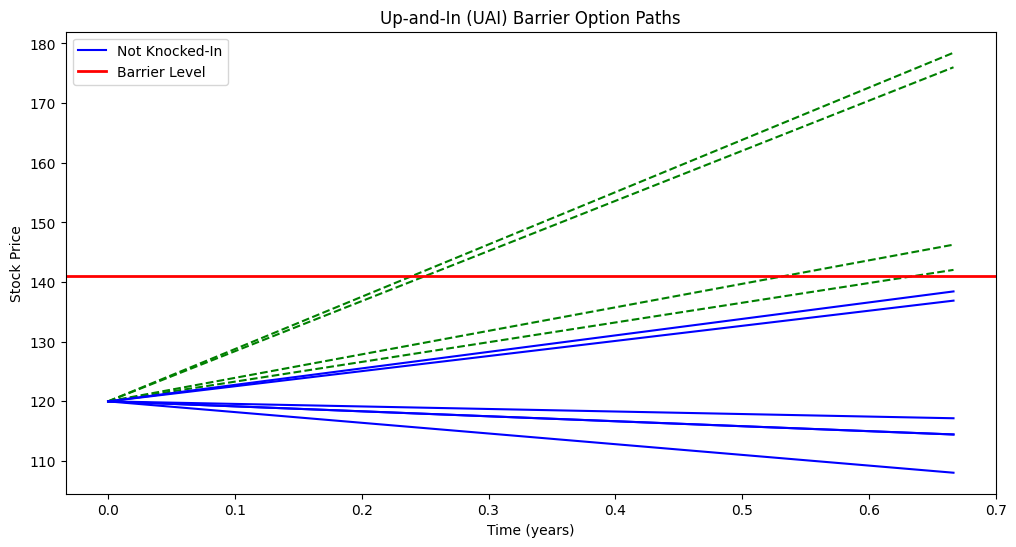

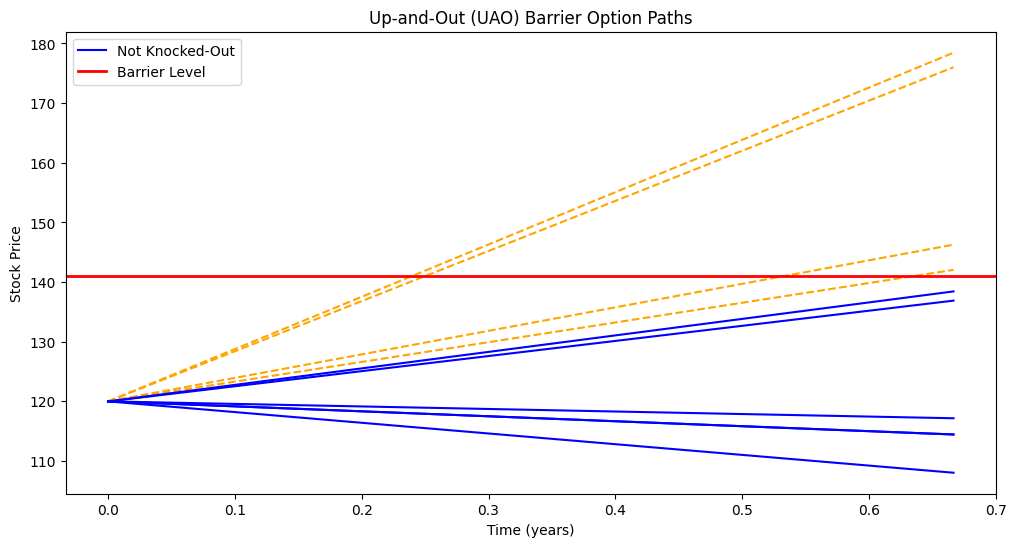

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class BarrierOptions:
    def __init__(self, option_type, S0, strike, T, M, r, sigma, simulations, barrier, barrier_type="none"):
        self.option_type = option_type
        self.S0 = S0
        self.strike = strike
        self.T = T
        self.M = M
        self.r = r
        self.sigma = sigma
        self.simulations = simulations
        self.barrier = barrier
        self.barrier_type = barrier_type
        self.time_unit = T / float(M)
        self.discount = np.exp(-r * self.time_unit)

    def simulate_paths(self, seed=42):
        np.random.seed(seed)
        price_paths = np.zeros((self.M + 1, self.simulations), dtype=np.float64)
        price_paths[0, :] = self.S0

        for t in range(1, self.M + 1):
            brownian = np.random.standard_normal(self.simulations)
            price_paths[t, :] = price_paths[t - 1, :] * np.exp(
                (self.r - 0.5 * self.sigma ** 2) * self.time_unit + self.sigma * brownian * np.sqrt(self.time_unit)
            )

        return price_paths

# Parameters
S0 = 120
strike = 120
T = 8 / 12  # 8 months as fraction of a year
M = 1  # daily steps
r = 0.06
sigma = 0.3
barrier = 141
simulations = 10000

# Initialize and simulate paths
UAI_option = BarrierOptions("call", S0, strike, T, M, r, sigma, simulations, barrier, barrier_type="UAI")
UAO_option = BarrierOptions("call", S0, strike, T, M, r, sigma, simulations, barrier, barrier_type="UAO")
paths = UAI_option.simulate_paths()

# Select a few sample paths for visualization
sample_paths = paths[:, :10]  # Select first 10 paths for visualization
time_points = np.linspace(0, T, M + 1)

# Plot Up-and-In Barrier (UAI)
plt.figure(figsize=(12, 6))
for i in range(sample_paths.shape[1]):
    if (sample_paths[:, i] >= barrier).any():  # Highlight path if it crosses the barrier
        plt.plot(time_points, sample_paths[:, i], color='green', linestyle='--', label="Knocked-In" if i == 0 else "")
    else:
        plt.plot(time_points, sample_paths[:, i], color='blue', label="Not Knocked-In" if i == 0 else "")

plt.axhline(y=barrier, color='red', linestyle='-', linewidth=2, label="Barrier Level")
plt.title("Up-and-In (UAI) Barrier Option Paths")
plt.xlabel("Time (years)")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# Plot Up-and-Out Barrier (UAO)
plt.figure(figsize=(12, 6))
for i in range(sample_paths.shape[1]):
    if (sample_paths[:, i] >= barrier).any():  # Highlight path if it crosses the barrier
        plt.plot(time_points, sample_paths[:, i], color='orange', linestyle='--', label="Knocked-Out" if i == 0 else "")
    else:
        plt.plot(time_points, sample_paths[:, i], color='blue', label="Not Knocked-Out" if i == 0 else "")

plt.axhline(y=barrier, color='red', linestyle='-', linewidth=2, label="Barrier Level")
plt.title("Up-and-Out (UAO) Barrier Option Paths")
plt.xlabel("Time (years)")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import numpy.random as npr
from scipy.stats import norm
import scipy.stats as ss
import matplotlib.pyplot as plt

def merton_eu_call_mc(S, K, r, T, t):
    payoff = np.maximum(0, S[-1, :] - K)

    average = np.mean(payoff)

    return np.exp(-r * (T - t)) * average

def merton_eu_put_mc(S, K, r, T, t):
    payoff = np.maximum(0, K - S[-1, :])

    average = np.mean(payoff)

    return np.exp(-r * (T - t)) * average

lamb = 0.75  # Lambda of the model or intensity
mu = -0.5  # Mu
delta = 0.22  # Delta

r = 0.055  # Risk-free rate
sigma = 0.35  # Volatility
T = 3/12  # Maturity/time period (in years)
S0 = 80  # Current Stock Price

Ite = 2000000  # Number of simulations (paths)
M = 10000  # Number of steps
dt = T / M  # Time-step

SM = np.zeros((M + 1, Ite))
SM[0] = S0

# rj
rj = lamb * (np.exp(mu + 0.5 * delta**2) - 1)

np.random.seed(42)

# Random numbers
z1 = np.random.standard_normal((M + 1, Ite))
z2 = np.random.standard_normal((M + 1, Ite))
y = np.random.poisson(lamb * dt, (M + 1, Ite))

for t in range(1, M + 1):
    SM[t] = SM[t - 1] * (
        np.exp((r - rj - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z1[t])
        + (np.exp(mu + delta * z2[t]) - 1) * y[t]
    )
    SM[t] = np.maximum(
        SM[t], 0.00001
    )  # To ensure that the price never goes below zero!

EU_Call = merton_eu_call_mc(SM, S0, r, T, 0)
print("European Call Price under Merton: ", EU_Call)
EU_Put = merton_eu_put_mc(SM, S0, r, T, 0)
print("European Put Price under Merton: ", EU_Put)

K =S0

# Parameters
discounted_strike = K * np.exp(-r * T)  # Discounted strike price

# Check put-call parity
parity_difference = (EU_Call - EU_Put) - (S0 - discounted_strike)

# Output results
print("Put-Call Parity Difference:", parity_difference)
if np.isclose(parity_difference, 0, atol=1e-6):
    print("Put-call parity holds within the tolerance.")
else:
    print("Put-call parity does not hold.")

In [ ]:
import numpy as np

# Parameters
S0 = 80  # Initial stock price
K = 80   # Strike price (ATM)
r = 0.055  # Risk-free rate
sigma = 0.35  # Volatility of diffusion component
T = 0.25  # Time to maturity in years (3 months)
lambda_jump = 0.25  # Jump intensity
mu_jump = -0.5  # Mean jump size (logarithmic)
delta_jump = 0.22  # Jump size standard deviation

# Monte Carlo parameters
N_sim = 1000000  # Number of simulations
N_steps = 50  # Time steps
dt = T / N_steps  # Time step size

# Derived parameters
r_j = lambda_jump * (np.exp(mu_jump + 0.5 * delta_jump**2) - 1)  # Drift correction

# Seed for reproducibility
np.random.seed(42)

# Pre-compute constants for efficiency
drift = (r - r_j - 0.5 * sigma**2) * dt
diffusion = sigma * np.sqrt(dt)

# Simulate stock paths
S_paths = np.zeros((N_sim, N_steps + 1))
S_paths[:, 0] = S0

for t in range(1, N_steps + 1):
    z1 = np.random.normal(0, 1, N_sim)  # Standard normal for diffusion
    y = np.random.poisson(lambda_jump * dt, N_sim)  # Poisson random variable for jumps
    z2 = np.random.normal(0, 1, N_sim)  # Standard normal for jump sizes

    jump_component = np.exp(mu_jump + delta_jump * z2) - 1
    S_paths[:, t] = S_paths[:, t - 1] * np.exp(drift + diffusion * z1) * (1 + jump_component)**y

# Payoff at maturity
call_payoff = np.maximum(S_paths[:, -1] - K, 0)
put_payoff = np.maximum(K - S_paths[:, -1], 0)

# Discounted payoffs for European options (baseline)
C_European = np.exp(-r * T) * np.mean(call_payoff)
P_European = np.exp(-r * T) * np.mean(put_payoff)

# American options using Least Squares Monte Carlo (LSM)
call_option_values = np.copy(call_payoff)
put_option_values = np.copy(put_payoff)

# Work backward through time steps for early exercise
for t in range(N_steps - 1, 0, -1):
    # In-the-money paths
    call_ITM = S_paths[:, t] > K
    put_ITM = S_paths[:, t] < K

    # Regression for continuation value
    if np.any(call_ITM):
        X_call = S_paths[call_ITM, t]
        Y_call = np.exp(-r * dt) * call_option_values[call_ITM]
        continuation_call = np.polyfit(X_call, Y_call, 2)
        expected_call = np.polyval(continuation_call, X_call)
        call_option_values[call_ITM] = np.maximum(call_payoff[call_ITM], expected_call)

    if np.any(put_ITM):
        X_put = S_paths[put_ITM, t]
        Y_put = np.exp(-r * dt) * put_option_values[put_ITM]
        continuation_put = np.polyfit(X_put, Y_put, 2)
        expected_put = np.polyval(continuation_put, X_put)
        put_option_values[put_ITM] = np.maximum(put_payoff[put_ITM], expected_put)

# Discounted American option values
C_American = np.exp(-r * dt) * np.mean(call_option_values)
P_American = np.exp(-r * dt) * np.mean(put_option_values)

# Verify put-call parity for American options
parity_check = C_American - P_American - (S0 - K * np.exp(-r * T))

# Output results
C_American, P_American, parity_check


(23.566266102916998, 20.15487143848667, 2.318922621793856)